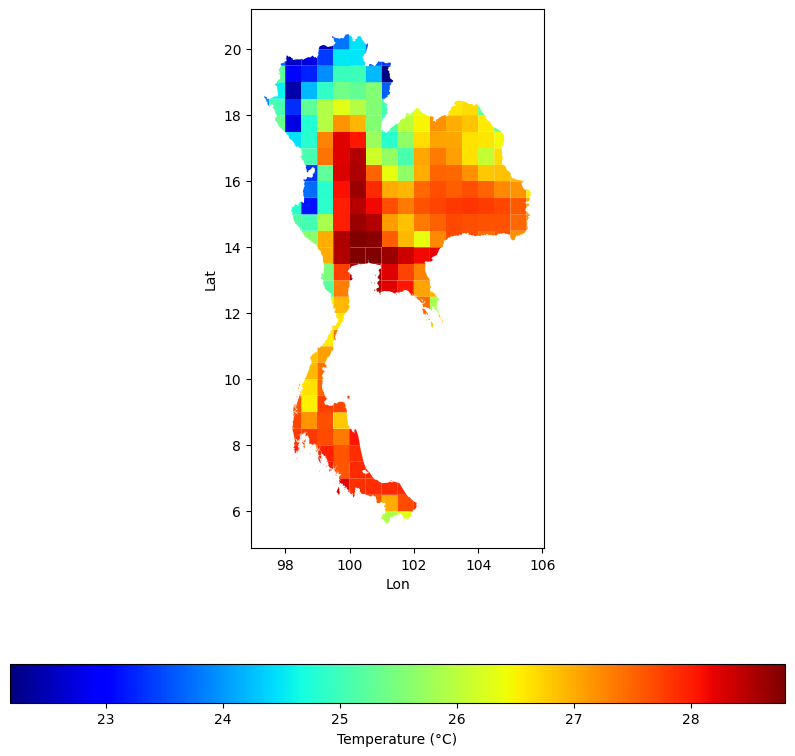

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

thailand = gpd.read_file("../Geo-data/candex_to_geo.json")
fig, ax = plt.subplots(figsize=(10, 10))

# thai_source.plot(column='temperature', cmap='jet', linewidth=0.5, ax=ax, edgecolor='black', legend=True)

thailand.plot(column='temperature', ax=ax, legend=True, cmap='jet', legend_kwds={'label': "Temperature (°C)", 'orientation': "horizontal"})

plt.xlabel('Lon')
plt.ylabel('Lat')
plt.show()

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# โหลดข้อมูล GeoJSON
geojson_path = "../Geo-data/Year-Dataset/province_all_2001.json"
gdf = gpd.read_file(geojson_path)

# ตรวจสอบข้อมูลใน GeoDataFrame
print(gdf.head())

# สร้างแผนที่ด้วย 12 subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 15))  # 3 แถว 4 คอลัมน์ = 12 subplots

# ใช้ color map ที่แตกต่างกันสำหรับการแสดงอุณหภูมิ
cmap = 'turbo'

# กำหนดค่าช่วงของแถบสี
vmin = 20
vmax = 30

# วนลูปผ่านทุกเดือน 1-12
for month in range(1, 13):
    # กรองข้อมูลตามเดือน
    gdf_filtered = gdf[gdf['month'] == month]

    # เลือก subplot ที่จะพล็อต
    ax = axes[(month - 1) // 4, (month - 1) % 4]

    # Plot ข้อมูลที่กรองออกมา (เดือนที่เลือก)
    gdf_filtered.plot(column='temperature', ax=ax, legend=True,
                     legend_kwds={'label': f"Temperature (°C) for Month {month}",
                                  'orientation': "horizontal"},
                     cmap=cmap, vmin=vmin, vmax=vmax)

    # ตั้งชื่อแผนที่สำหรับแต่ละเดือน
    ax.set_title(f"Month {month} - Avg Temp", fontsize=12)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# ปรับระยะห่างระหว่าง subplots
plt.tight_layout()

# แสดงแผนที่
plt.show()


# import geopandas as gpd
# import matplotlib.pyplot as plt
# import numpy as np

# # โหลดข้อมูล GeoJSON
# geojson_path = "../Geo-data/Year-Dataset/province_all_2001.json"
# gdf = gpd.read_file(geojson_path)

# # ตรวจสอบข้อมูลใน GeoDataFrame
# print(gdf.head())

# # เลือกช่วงเดือนที่ต้องการกรอง (ตัวอย่าง: เดือน 4)
# month_to_filter = 4

# # กรองข้อมูลที่เดือนตรงกับที่ต้องการ
# gdf_filtered = gdf[gdf['month'] == month_to_filter]

# # ตรวจสอบข้อมูลหลังการกรอง
# print(gdf_filtered.head())

# # สร้างแผนที่
# fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# # ใช้ color map ที่แตกต่างกันสำหรับการแสดงอุณหภูมิ
# cmap = 'jet'

# # Plot ข้อมูลที่กรองออกมา (เดือนที่เลือก)
# gdf_filtered.plot(column='temperature', ax=ax, legend=True,
#                   legend_kwds={'label': f"Temperature (°C) for Month {month_to_filter}",
#                                'orientation': "horizontal"},
#                   cmap=cmap)

# # เพิ่มชื่อแผนที่และคำอธิบาย
# ax.set_title(f"Average Temperature in Thailand for Month {month_to_filter} of 2001", fontsize=15)
# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')

# # แสดงแผนที่
# plt.show()




Year 1901:
         name  temperature        region  month  \
0  Chiang Rai        19.98  North_region      1   
1  Chiang Mai        20.04  North_region      1   
2         Nan        20.41  North_region      1   
3      Phayao        20.69  North_region      1   
4       Phrae        22.58  North_region      1   

                                            geometry  
0  POLYGON ((100.40856 19.73394, 100.36058 19.687...  
1  POLYGON ((99.40246 18.99756, 99.37643 18.98298...  
2  POLYGON ((101.08893 18.37849, 101.00188 18.307...  
3  POLYGON ((100.58582 19.4815, 100.56662 19.4339...  
4  POLYGON ((100.34192 18.80352, 100.35856 18.782...   

Monthly Average Temperatures for Year 1901:
Month 1: 24.77 °C
Month 2: 26.45 °C
Month 3: 28.13 °C
Month 4: 29.71 °C
Month 5: 28.63 °C
Month 6: 28.46 °C
Month 7: 27.90 °C
Month 8: 27.65 °C
Month 9: 27.16 °C
Month 10: 26.86 °C
Month 11: 25.55 °C
Month 12: 23.91 °C


Year 1902:
         name  temperature        region  month  \
0  Chiang Rai        18

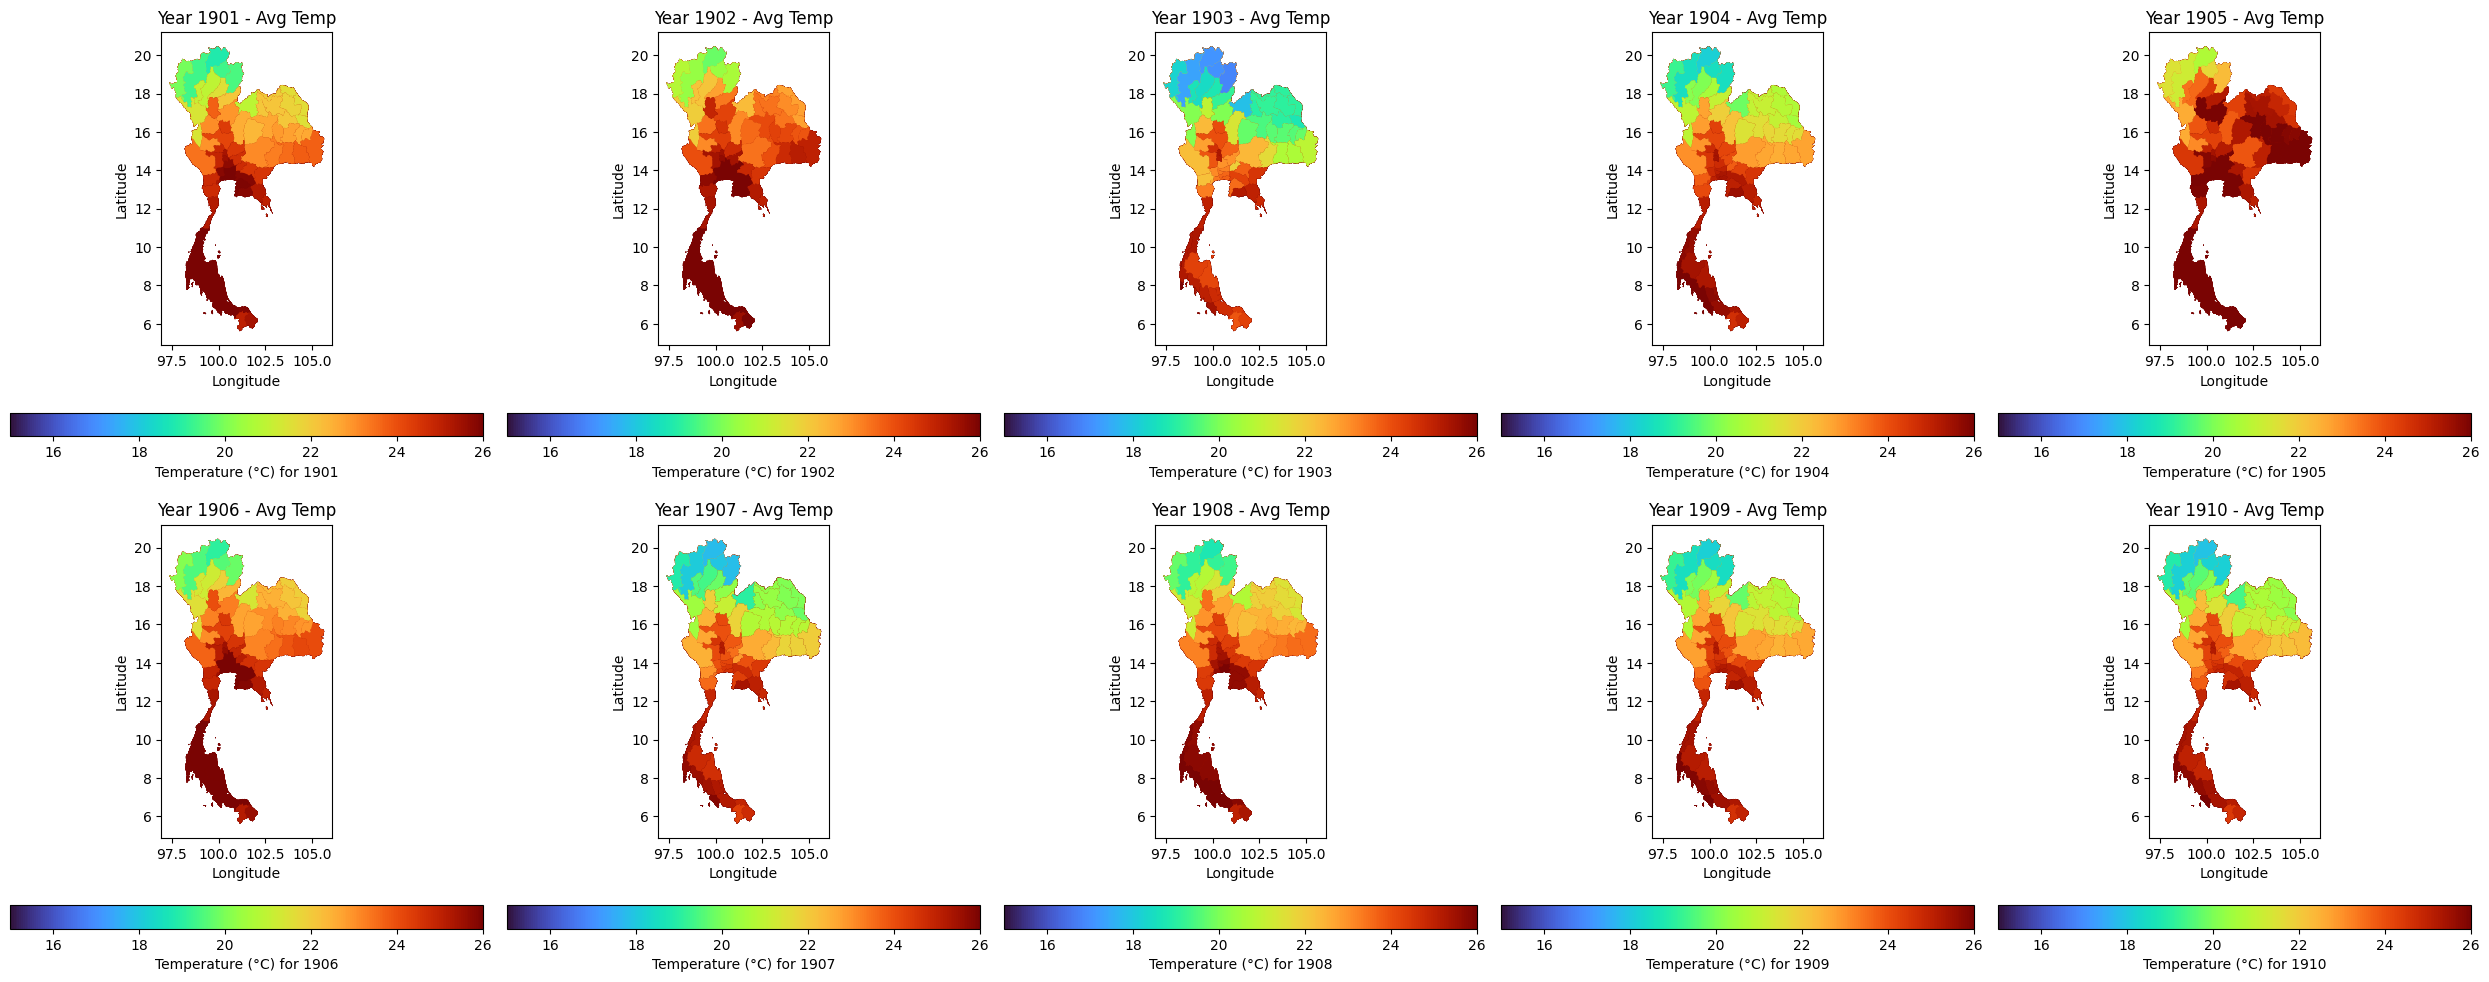

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# กำหนดค่าพื้นฐาน
start_year = 1901
end_year = 1910
base_path = "../Geo-data/Year-Dataset/"

# สร้างกราฟสำหรับแต่ละปี
fig, axes = plt.subplots(2, 5, figsize=(25, 10))  # 2 แถว 5 คอลัมน์ = 10 subplot
cmap = 'turbo'  # เลือก colormap
vmin, vmax = 20, 30  # ช่วงของอุณหภูมิ

# วนลูปผ่านทุกปี
for idx, year in enumerate(range(start_year, end_year + 1)):
    # โหลดข้อมูล GeoJSON ของปีนั้น
    file_path = f"{base_path}data_polygon_{year}.json"
    gdf = gpd.read_file(file_path)
    
    # ตรวจสอบข้อมูล
    print(f"Year {year}:")
    print(gdf.head(), "\n")

    # คำนวณค่าเฉลี่ยอุณหภูมิรายเดือน
    monthly_avg = []
    for month in range(1, 13):
        avg_temp = gdf[gdf['month'] == month]['temperature'].mean()
        monthly_avg.append(avg_temp)
    
    # แสดงผลค่าเฉลี่ยอุณหภูมิรายเดือน
    print(f"Monthly Average Temperatures for Year {year}:")
    for month, avg in enumerate(monthly_avg, 1):
        print(f"Month {month}: {avg:.2f} °C")
    print("\n")

    # พล็อตข้อมูลเฉลี่ยรายเดือน
    ax = axes[idx // 5, idx % 5]
    gdf.plot(column='temperature', ax=ax, legend=True,
             legend_kwds={'label': f"Temperature (°C) for {year}",
                          'orientation': "horizontal"},
             cmap=cmap, vmin=vmin, vmax=vmax)
    
    ax.set_title(f"Year {year} - Avg Temp", fontsize=12)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# ปรับ layout ของ subplot
plt.tight_layout()

# แสดงกราฟ
plt.show()


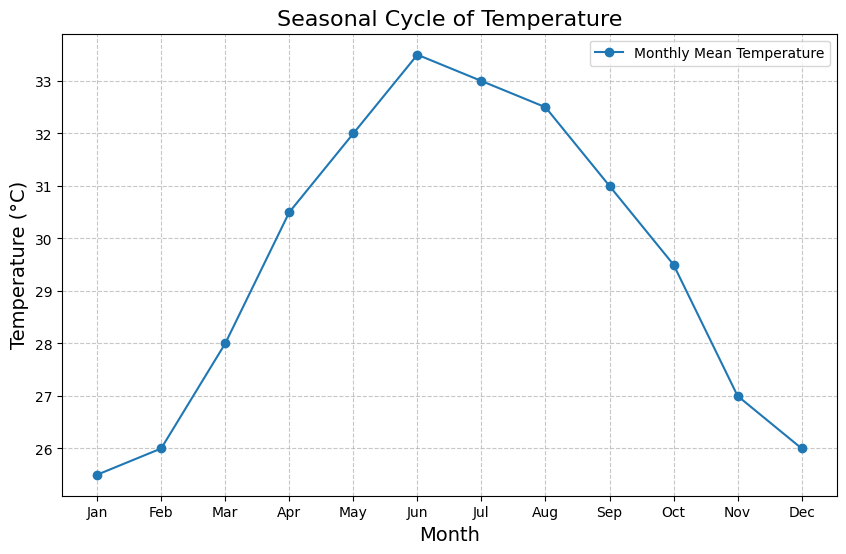

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# สร้างตัวอย่างข้อมูล
data = {
    "Month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    "Temperature": [25.5, 26.0, 28.0, 30.5, 32.0, 33.5, 33.0, 32.5, 31.0, 29.5, 27.0, 26.0],
}

# สร้าง DataFrame
df = pd.DataFrame(data)

# Plot Seasonal Cycle
plt.figure(figsize=(10, 6))
plt.plot(df["Month"], df["Temperature"], marker='o', label='Monthly Mean Temperature')
plt.title("Seasonal Cycle of Temperature", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Temperature (°C)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()
